In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
# Đọc dữ liệu từ file CSV
data_path = '../../Dataset/shopping_behavior_updated.csv'  # Đường dẫn tới dataset
data = pd.read_csv(data_path)

# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(data.info())
print("\nMẫu dữ liệu:")
print(data.head())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Payment Method          3900 non-null   object 
 14  Frequency of Purchase

In [7]:
# Lựa chọn các cột số
numerical_columns = data.select_dtypes(include=[np.number]).columns
data_numerical = data[numerical_columns].dropna()  # Loại bỏ các hàng chứa giá trị thiếu

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Kiểm tra dữ liệu sau khi chuẩn hóa
print("Dữ liệu sau khi chuẩn hóa:")
print(data_scaled[:5])

Dữ liệu sau khi chuẩn hóa:
[[-1.73160675  0.71891344 -0.28562864 -0.90758357]
 [-1.73071852 -1.64862924  0.17885219 -0.90758357]
 [-1.72983029  0.39008807  0.55888195 -0.90758357]
 [-1.72894206 -1.51709909  1.27671595 -0.34902654]
 [-1.72805382  0.0612627  -0.45453076 -1.46614061]]


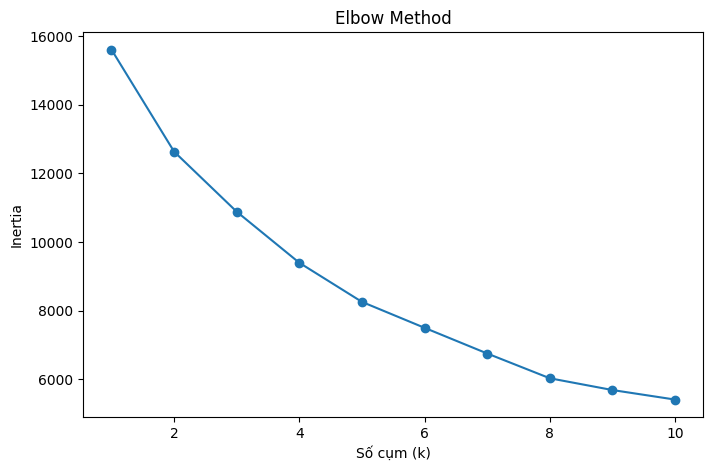

In [8]:
# Tìm số cụm tối ưu bằng Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.show()


In [10]:
from kneed import KneeLocator

# Tìm điểm gấp khúc
knee_locator = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

print(f"Số cụm tối ưu: {optimal_k}")

Số cụm tối ưu: 5


In [11]:
# Áp dụng K-Means với số cụm tối ưu (k=5)
k = 5  # Số cụm tối ưu
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Gán nhãn cụm vào dữ liệu gốc
data['Cluster'] = kmeans.labels_

# Hiển thị kết quả phân cụm
print("Kết quả phân cụm:")
print(data['Cluster'].value_counts())

Kết quả phân cụm:
Cluster
1    817
2    799
3    784
0    755
4    745
Name: count, dtype: int64


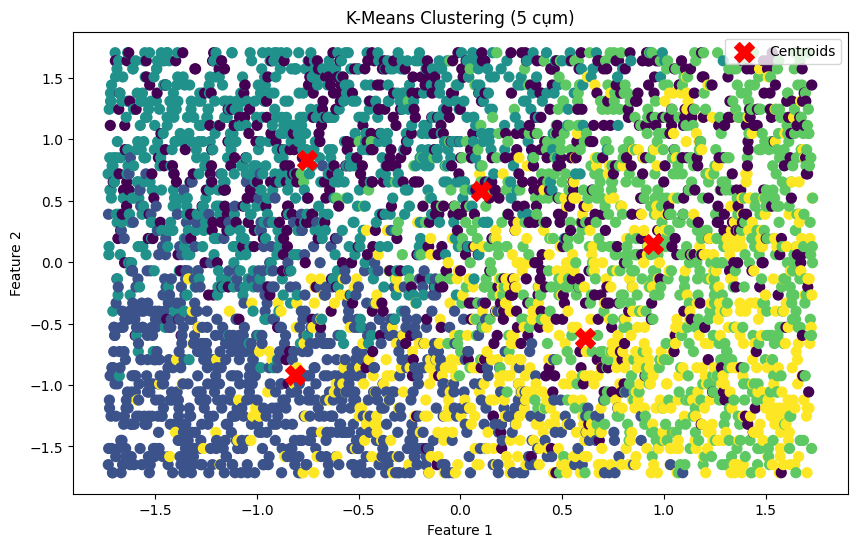

In [12]:
# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (5 cụm)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [13]:
# Xem dữ liệu theo từng cụm
for cluster in range(k):
    print(f"Cụm {cluster}:")
    print(data[data['Cluster'] == cluster].describe())

Cụm 0:
       Customer ID         Age  Purchase Amount (USD)  Review Rating  Cluster
count   755.000000  755.000000             755.000000     755.000000    755.0
mean   2068.129801   52.842384              82.495364       4.351523      0.0
std    1028.327429   11.865752              12.927298       0.445826      0.0
min      13.000000   18.000000              42.000000       2.900000      0.0
25%    1246.500000   45.000000              73.000000       4.000000      0.0
50%    2124.000000   54.000000              84.000000       4.400000      0.0
75%    2892.500000   62.500000              94.000000       4.700000      0.0
max    3895.000000   70.000000             100.000000       5.000000      0.0
Cụm 1:
       Customer ID         Age  Purchase Amount (USD)  Review Rating  Cluster
count   817.000000  817.000000             817.000000     817.000000    817.0
mean   1031.036720   30.057528              69.354957       3.538311      1.0
std     711.854442    8.708114              19.969

Dựa trên kết quả phân cụm với **5 cụm**, ta có thể rút ra các kết luận sau:


**1. Đặc điểm của từng cụm:**
- **Cụm 0**:
  - Khách hàng lớn tuổi nhất (tuổi trung bình: 52.8).
  - Chi tiêu trung bình cao nhất (**82.5 USD**).
  - Đánh giá sản phẩm cao (**4.35**).
  - Đây có thể là nhóm khách hàng trung thành, chi tiêu nhiều và hài lòng với sản phẩm.

- **Cụm 1**:
  - Khách hàng trẻ nhất (tuổi trung bình: 30.0).
  - Chi tiêu trung bình thấp hơn (**69.3 USD**).
  - Đánh giá sản phẩm thấp nhất (**3.53**).
  - Đây có thể là nhóm khách hàng trẻ, ít hài lòng và chi tiêu vừa phải.

- **Cụm 2**:
  - Khách hàng lớn tuổi (tuổi trung bình: 56.7).
  - Chi tiêu trung bình thấp nhất (**42.2 USD**).
  - Đánh giá sản phẩm trung bình (**3.56**).
  - Đây có thể là nhóm khách hàng lớn tuổi, ít chi tiêu và không quá hài lòng.

- **Cụm 3**:
  - Khách hàng trung niên (tuổi trung bình: 46.3).
  - Chi tiêu trung bình (**62.7 USD**).
  - Đánh giá sản phẩm thấp (**3.05**).
  - Đây có thể là nhóm khách hàng trung niên, chi tiêu vừa phải nhưng không hài lòng.

- **Cụm 4**:
  - Khách hàng trẻ (tuổi trung bình: 34.5).
  - Chi tiêu trung bình thấp (**41.8 USD**).
  - Đánh giá sản phẩm cao (**4.30**).
  - Đây có thể là nhóm khách hàng trẻ, chi tiêu ít nhưng hài lòng với sản phẩm.


**2. Hành động đề xuất:**
- **Cụm 0**: Tập trung giữ chân nhóm khách hàng trung thành này bằng các chương trình ưu đãi đặc biệt.
- **Cụm 1**: Cải thiện chất lượng sản phẩm/dịch vụ để tăng sự hài lòng của nhóm khách hàng trẻ.
- **Cụm 2**: Tìm hiểu lý do chi tiêu thấp và cải thiện trải nghiệm mua sắm cho nhóm khách hàng lớn tuổi.
- **Cụm 3**: Tăng cường các chiến dịch marketing để cải thiện sự hài lòng của nhóm khách hàng trung niên.
- **Cụm 4**: Khuyến khích nhóm khách hàng trẻ chi tiêu nhiều hơn thông qua các chương trình khuyến mãi.


**3. Kết luận tổng quan:**
Phân cụm đã giúp xác định rõ các nhóm khách hàng dựa trên hành vi mua sắm, độ tuổi, mức chi tiêu và mức độ hài lòng. Từ đó, doanh nghiệp có thể đưa ra các chiến lược phù hợp để tối ưu hóa doanh thu và cải thiện trải nghiệm khách hàng.